In [59]:
try:
    import torch
    import matplotlib.pyplot as plt
except ModuleNotFoundError as e:
    !pip3 install matplotlib torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

# Pytorch core concepts
- `numpy`-like interface
- Can compute easily gradients
- Provide optimizers to solve minimum problem
- Provide utility to build dataset

## Gradient

In [36]:
#initialize a tensor
a = torch.tensor([1,2,3,4], requires_grad=True,dtype=torch.float64)
a

tensor([1., 2., 3., 4.], dtype=torch.float64, requires_grad=True)

Performing:
$$
  b = \sum_i 2a_i
$$

In [37]:
b = 2*a
b = b.sum()

You should then get:
$$
 \frac{\partial b}{a_i}=2
$$

In [38]:
# Perform gradient computation
b.backward()
print(a.grad)

tensor([2., 2., 2., 2.], dtype=torch.float64)


## Optimizers
Pytorch has some nice built-in optimizers, for instance an implementation of gradient descent. 

### Find the minimum of a parabola using pytorch SGD built-in optimizer

Starting from $x = 0$ we use gradient descent to find the minimum of $f(x)=(x-3)^2$.

In [39]:
# Step 1: Initialize x as a learnable parameter
x = torch.tensor([0.0], requires_grad=True)  # Start at x = 0

# Step 2: Setup the objective/loss/cost function
f = lambda x : (x - 3) ** 2 

# Step 3: Set up the optimizer
optimizer = torch.optim.SGD([x], lr=0.1)

# Utils to plot later
points=list()
values=list()
grads=list()

## Training Loop Prototype

This isn't a full training loop, but the steps we use to minimize a simple parabola are the same core steps used during training a real model.

In [40]:

# Step 4: Run optimization loop
for step in range(20):
    # Zero gradients from the previous step
    optimizer.zero_grad()
    
    # Calculate the loss value
    y = f(x)  # Rembember: f(x) = (x - 3)^2
    
    # Compute gradients
    y.backward()

    # Plot utils ! 
    values.append(y.item())
    points.append(x.item())
    grads.append(x.grad.item())
    print(f"Step {step+1:2d}: x = {x.item():.4f}, f(x) = {y.item():.4f}, grad = {x.grad.item():.4f}")

    # Update x (parameter) using GD
    optimizer.step()

Step  1: x = 0.0000, f(x) = 9.0000, grad = -6.0000
Step  2: x = 0.6000, f(x) = 5.7600, grad = -4.8000
Step  3: x = 1.0800, f(x) = 3.6864, grad = -3.8400
Step  4: x = 1.4640, f(x) = 2.3593, grad = -3.0720
Step  5: x = 1.7712, f(x) = 1.5099, grad = -2.4576
Step  6: x = 2.0170, f(x) = 0.9664, grad = -1.9661
Step  7: x = 2.2136, f(x) = 0.6185, grad = -1.5729
Step  8: x = 2.3709, f(x) = 0.3958, grad = -1.2583
Step  9: x = 2.4967, f(x) = 0.2533, grad = -1.0066
Step 10: x = 2.5973, f(x) = 0.1621, grad = -0.8053
Step 11: x = 2.6779, f(x) = 0.1038, grad = -0.6442
Step 12: x = 2.7423, f(x) = 0.0664, grad = -0.5154
Step 13: x = 2.7938, f(x) = 0.0425, grad = -0.4123
Step 14: x = 2.8351, f(x) = 0.0272, grad = -0.3299
Step 15: x = 2.8681, f(x) = 0.0174, grad = -0.2639
Step 16: x = 2.8944, f(x) = 0.0111, grad = -0.2111
Step 17: x = 2.9156, f(x) = 0.0071, grad = -0.1689
Step 18: x = 2.9324, f(x) = 0.0046, grad = -0.1351
Step 19: x = 2.9460, f(x) = 0.0029, grad = -0.1081
Step 20: x = 2.9568, f(x) = 0.0

Visualize the values of $x$,$f(x)$ and its gradient during the optimization:

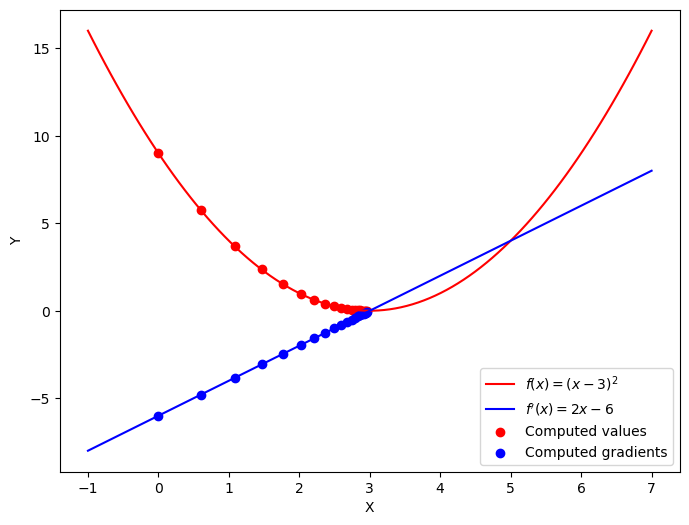

In [41]:
x_vals = torch.linspace(-1, 7, steps=100)
y_vals = f(x_vals)
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label=r'$f(x) = (x - 3)^2$', color='red')
plt.plot(x_vals, 2*x_vals-6, label=r"$f'(x) = 2x-6$", color='blue')

plt.scatter(points, values , color='red', label='Computed values')
plt.scatter(points, grads , color='blue', label='Computed gradients')
plt.xlabel("X")
plt.ylabel("Y")

_ = plt.legend()

# Train the simplest model

In this section, we'll train a single neuron with no non-linearity applied, which is just a fancy way of saying we're **training a linear model**.

## Generate a very simple dataset 

Let's generate some points from the function $f(x)=2x+1$, and add a bit of noise.
We'll use these points to train a single neuron to learn the weight and bias — **just two parameters in total**.

In [82]:
# Step 1: Generate random x values
torch.manual_seed(0)  
x_array = torch.unsqueeze(torch.linspace(0, 10, 500), dim=1)  

# Step 2: Generate y values around the line y = 2x + 1 + noise
noise = torch.randn(x_array.size()) * 1.0  # noise with std=1.0
y_array = 2 * x_array + 1 + noise  # shape: (100, 1)


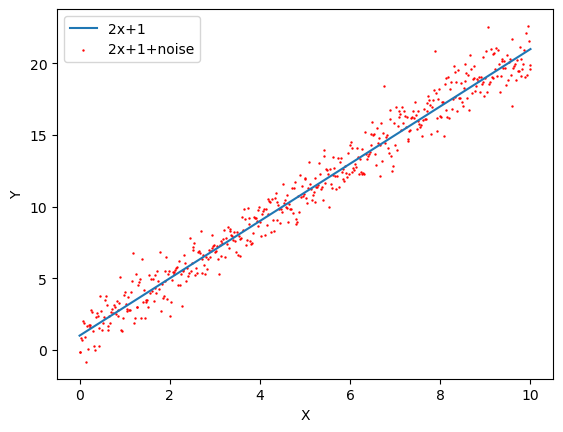

In [83]:
## Visualize data
plt.plot(x_array,2 * x_array + 1,label="2x+1")
plt.scatter(x_array,y_array,label="2x+1+noise",s = 0.5,color="red")
plt.xlabel("X")
plt.ylabel("Y")
_ = plt.legend()

## Dataset and DataLoader

Next, we create a dataset and use it to instantiate a DataLoader, which will feed us data in batches.
A DataLoader is essentially an iterator that we loop through during a training epoch.

By enabling shuffling, we ensure that at each step, we sample random $(x,y)$ pairs from the dataset, this help the model generalize better.

In [84]:
# Step 3: Create TensorDataset and DataLoader
from torch.utils.data import TensorDataset, DataLoader
dataset = TensorDataset(x_array, y_array)
batch_size = 10
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


Get a batch from the data loader:

In [85]:
# Optional: check one batch
for batch_x, batch_y in data_loader:
    print("Batch x:", batch_x[:5].squeeze())
    print("Batch y:", batch_y[:5].squeeze())
    break

Batch x: tensor([ 7.6954, 10.0000,  8.5772,  2.7054,  5.1703])
Batch y: tensor([16.6850, 19.5982, 19.3453,  5.3477, 10.8451])


## Single neuron neural network
Here's what a single-neuron model looks like:
a linear layer with one input feature, one output feature, and a bias term.

We define a `forward()` function that takes an input `x` and returns the output of the linear layer, `self.linear`, which we initialized in the constructor.

In [86]:
import torch.nn as nn

class SingleNeuronModel(nn.Module):
    def __init__(self):
        super(SingleNeuronModel, self).__init__()
        # One input feature, one output (one neuron)
        self.linear = nn.Linear(in_features=1, out_features=1, bias=True)
    def forward(self, x):
        return self.linear(x)

# Training checklist

Before we can train our model, we need:

- [x] A dataset

- [ ] A loss function

- [ ] An optimizer

- [ ] A model instance

We've already created the dataset in the previous step.
Since this is a **regression** task, we'll use **Mean Squared Error**  as our loss function.

Next, we instantiate the optimizer and pass it the model's parameters, these are the values it will update using the computed gradients.

In [90]:
model = SingleNeuronModel()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)
loss = torch.nn.MSELoss()

# Utils:
losses=list()

# Training loop

We're now ready to train our model.
The training loop is structured around two main for loops:

- The outer loop runs for a number of epochs, controlling **how many times the model sees the entire dataset**.

- The inner loop iterates over the dataset **batch by batch**.

- 
For each batch, the model makes predictions, we compute the loss, and we update its weights using backpropagation.

This process gradually improves the model's performance on the task.

In [91]:
for epoch in range(15):
    for batch_x, batch_y in data_loader:
        # reset the gradient
        optimizer.zero_grad()     
        # Do the forward pass
        y_predicted = model(batch_x)
        # Get the loss value comparing y_predicted with the true value
        l = loss(y_predicted, batch_y)
        # Get the gradients
        l.backward()
        # Apply the weight update!
        optimizer.step()
        losses.append(l.item())

## Loss function value during the training

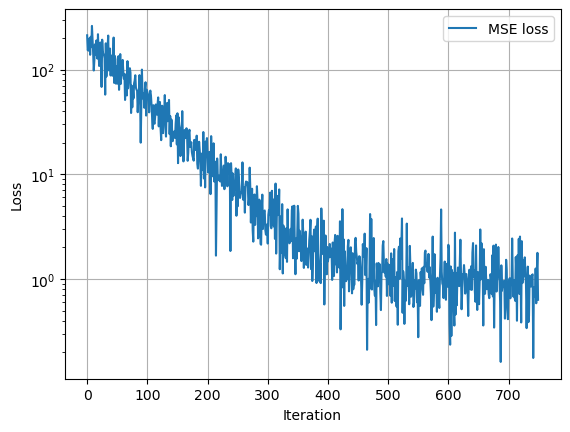

In [92]:
plt.plot(losses, label="MSE loss")
plt.yscale('log')       
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# Learned parameters
Look at the weight and the bias learned during the train.


In [95]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

linear.weight tensor([[2.0180]])
linear.bias tensor([0.8651])


Next, we compare the model’s output over the interval $[0,10]$ with the exact function $f(x)=2x+1$.

Note the use of the `with torch.no_grad()` context manager, it allows us to perform forward passes without tracking gradients, which saves both memory and computation.

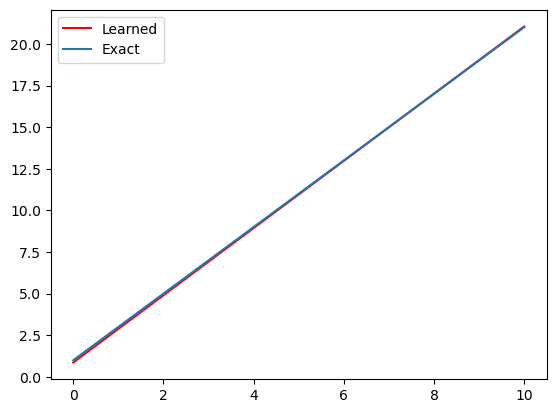

In [97]:
with torch.no_grad():
    x = torch.unsqueeze(torch.linspace(0, 10, 30), dim=1)
    y = model(x)
    plt.plot(x ,y,color="red",label="Learned" )
    plt.plot(x ,2*x+1,label= "Exact")
    plt.legend()